In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1, 2, 3 download juptyr import pandas and load csv

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

## 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


## 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [5]:
gdp_df.shape

(7662, 4)

In [6]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

## 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita', 'vf']

In [8]:
gdp_df = gdp_df.drop(columns=['vf'])

In [9]:
gdp_df.head(2)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002


gdp_df_droped = gdp_df.drop('Value Footnotes', axis=1)
gdp_df_droped.head()

gdp_df.pop('   ') left blank last column
gdp_df.pop('Value Footnotes')
gdp_df.head()

gdp_df.rename(columns={'Countrt or Area':'Country', 'Years':'Year'})

## 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [10]:
gdp_df7 = gdp_df['Year'].nunique()

In [11]:
gdp_df7_counts = gdp_df.groupby(['Country']).count().sort_values(by='Year')

In [12]:
gdp_df7_counts

,Year,GDP_Per_Capita
Country,,
Djibouti,10,10
Somalia,10,10
Turks and Caicos Islands,12,12
Sint Maarten (Dutch part),14,14
Kosovo,15,15
...,...,...
Jamaica,33,33
Japan,33,33
Jordan,33,33


In [13]:
gdp_df7fn = gdp_df7_counts[gdp_df7_counts['Year']==33]

In [14]:
gdp_df7fn

,Year,GDP_Per_Capita
Country,,
Papua New Guinea,33,33
Pakistan,33,33
Australia,33,33
Pacific island small states,33,33
Austria,33,33
...,...,...
Jamaica,33,33
Japan,33,33
Jordan,33,33


In [15]:
gdp_df7fln = gdp_df7_counts[gdp_df7_counts['Year']<33]

In [16]:
len(gdp_df7fln)

40

In [17]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


## 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [18]:
gdp_df_2020 = gdp_df[gdp_df['Year']==2020]

In [19]:
gdp_df_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


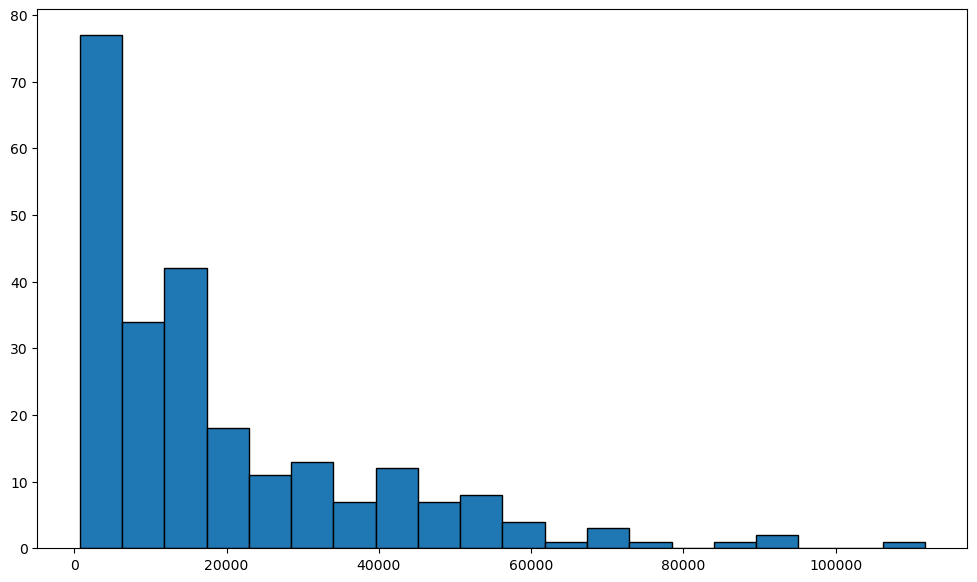

In [20]:
plt. ax = plt.subplots(figsize =(12,7))
plt.hist(gdp_df_2020['GDP_Per_Capita'], bins=20,edgecolor='black')
plt.show()

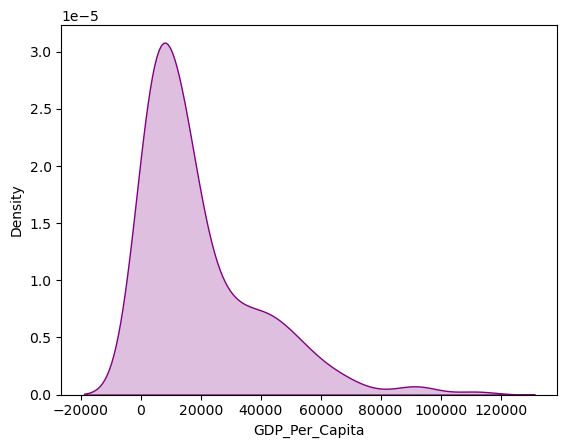

In [21]:
sns.kdeplot(gdp_df_2020['GDP_Per_Capita'], fill = True, color = 'purple')
plt.show()

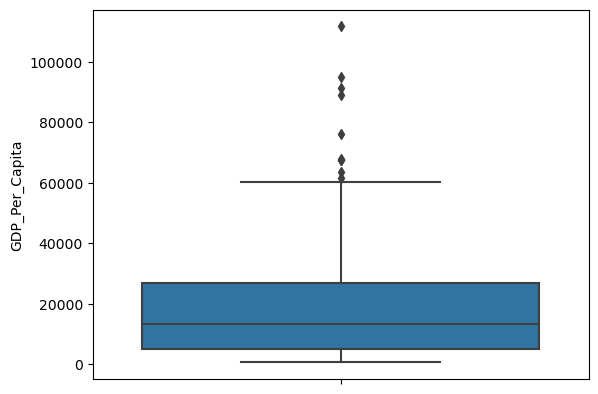

In [22]:
sns.boxplot(y=gdp_df_2020['GDP_Per_Capita'])
plt.show()

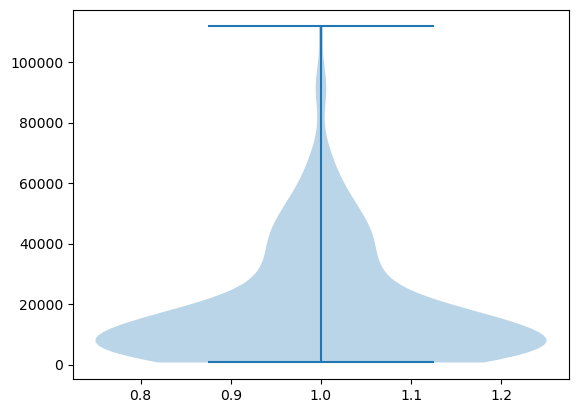

In [23]:
plt.violinplot(gdp_df_2020['GDP_Per_Capita'])
plt.show()

## 9. What was the median GDP per capita value in 2020?

In [24]:
gdp_df_2020['GDP_Per_Capita'].median()

13357.997573370474

In [25]:
round(gdp_df_2020['GDP_Per_Capita'].median(),2)

13358.0

## 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [26]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]

In [27]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


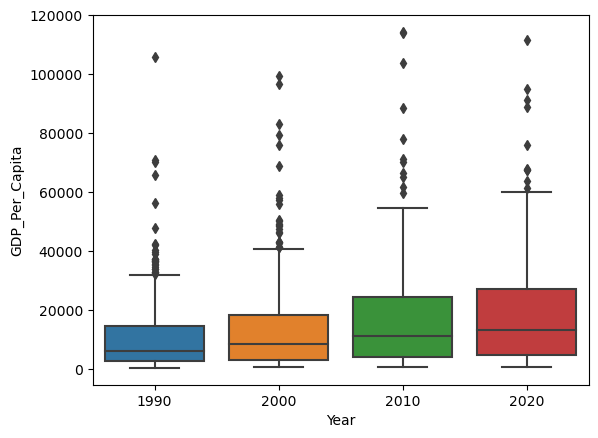

In [28]:
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])
plt.show()

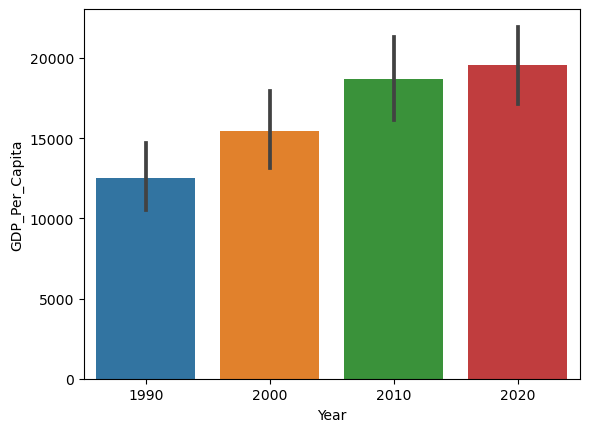

In [29]:
sns.barplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita)
plt.show()

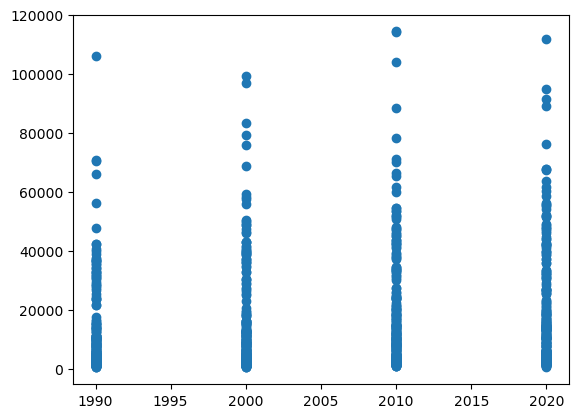

In [30]:
plt.scatter(y=gdp_decades.GDP_Per_Capita, x=gdp_decades.Year)
plt.show()

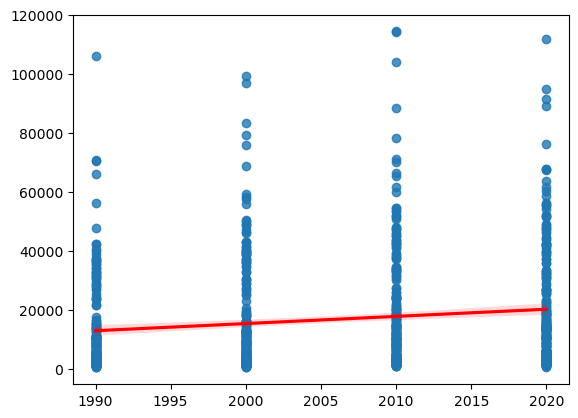

In [31]:
sns.regplot(y=[gdp_decades.GDP_Per_Capita], x=[gdp_decades.Year], line_kws ={"color":"r"})
plt.show()

INSERT COMMENT mo' time, mo' money, mo' problems?

## 11. Which country was the first to have a GDP per capita greater than $100,000?

In [32]:
gdp_dfgreat = gdp_df[gdp_df['GDP_Per_Capita']>=100000].sort_values('Year').reset_index()

In [33]:
gdp_dfgreat.loc[0]

index                             7302
Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           105893.626059
Name: 0, dtype: object

## 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

## automate this?

max_gpd = gdp_df_2020['GDP_Per_Capita'].max()
gpd_df_2020[gdp_df_2020['GDP_Per_Capita'].idxmax()]
gpd_df_2020[gdp_df_2020['Year']==2020].nlargeste(1,'GDP_Per_Capita')

In [34]:
gdp_df2020R= gdp_df[gdp_df['Year']==2020].sort_values('GDP_Per_Capita', ascending=False)

In [35]:
gdp_df2020R.head(1)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [36]:
gdp_df_luxembourg = gdp_df[gdp_df['Country']=='Luxembourg']

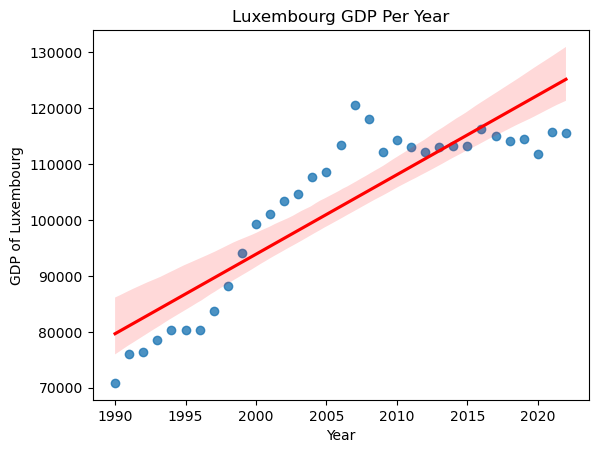

In [37]:
sns.regplot(x=gdp_df_luxembourg.Year, y=gdp_df_luxembourg.GDP_Per_Capita, line_kws ={"color":"r"})
plt.title("Luxembourg GDP Per Year")
plt.xlabel("Year")
plt.ylabel("GDP of Luxembourg")
plt.show()

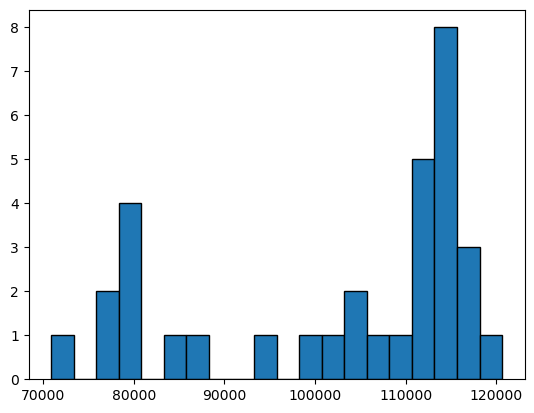

In [38]:
plt.hist(gdp_df_luxembourg['GDP_Per_Capita'], bins=20,edgecolor='black')
plt.show()

## 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 
**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [39]:
gdp_df2020P= gdp_df[gdp_df['Year']==2020].sort_values('GDP_Per_Capita', ascending=True)

In [40]:
gdp_df2020P.head(1)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [41]:
gdp_df_burundi = gdp_df[gdp_df['Country']=='Burundi']

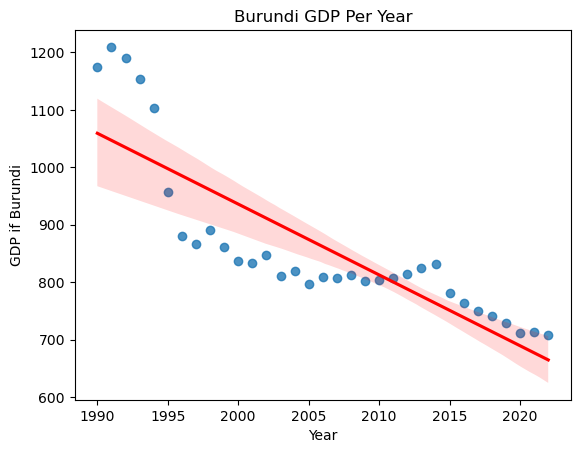

In [42]:
sns.regplot(x=[gdp_df_burundi.Year], y=[gdp_df_burundi.GDP_Per_Capita], line_kws ={"color":"r"})
plt.title("Burundi GDP Per Year")
plt.xlabel("Year")
plt.ylabel("GDP if Burundi")
plt.show()

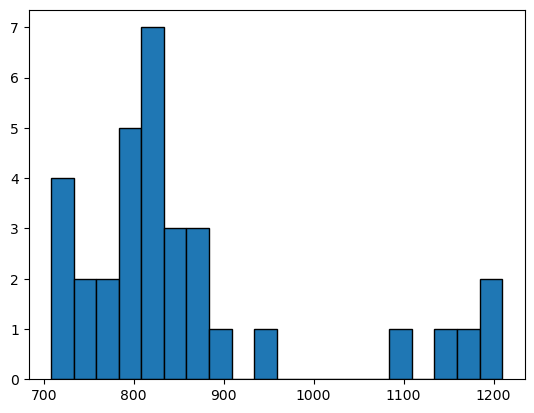

In [43]:
plt.hist(gdp_df_burundi['GDP_Per_Capita'], bins=20,edgecolor='black')
plt.show()

 ## Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [44]:
gdp_comp = pd.merge(
    left = gdp_df[gdp_df['Year']==1990],
    right= gdp_df[gdp_df['Year']==2020],
    on = 'Country',
    suffixes =['_1990','_2020']
    )
gdp_comp['2020_lower'] = gdp_comp['GDP_Per_Capita_2020']<gdp_comp['GDP_Per_Capita_1990']

In [45]:
gdp_comp

,Country,Year_1990,GDP_Per_Capita_1990,Year_2020,GDP_Per_Capita_2020,2020_lower
0,Africa Eastern and Southern,1990,3037.297466,2020,3455.023119,False
1,Africa Western and Central,1990,2788.301039,2020,3957.933804,False
2,Albania,1990,4827.027705,2020,13278.369769,False
3,Algeria,1990,8828.874473,2020,10844.770764,False
4,Angola,1990,5793.084512,2020,6029.691895,False
...,...,...,...,...,...,...
202,Vanuatu,1990,2774.138350,2020,2848.970240,False
203,Viet Nam,1990,2099.394649,2020,10450.622382,False
204,World,1990,9705.981267,2020,16204.169107,False
205,Zambia,1990,2290.039226,2020,3183.650773,False


In [46]:
gdb_bonuss = gdp_df

In [47]:
bonus =gdb_bonuss[gdb_bonuss['Year'].isin([1990,2020])]

In [48]:
plot_bonus = bonus.groupby('Year')['GDP_Per_Capita'].describe()

In [49]:
plot_bonus.head()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1990,207.0,12506.088374,15167.399935,460.123697,2915.057031,6223.452994,14584.911473,105893.626059
2020,242.0,19586.754446,19640.401631,711.355263,4961.408532,13357.997573,27064.125293,111751.314751


plt.hist(plot_bonus)
plt.show()

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

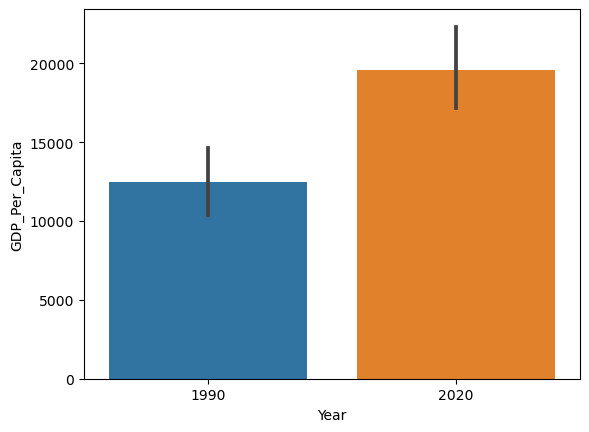

In [50]:
sns.barplot(x=bonus.Year, y=bonus.GDP_Per_Capita)

gdp_bonus = gdp_df[gdp_df['Year'].isin([1990,2020])]

gdp_bonus.dropna()

gdp_bonus_2020 = [gdp_bonus['Year']==2020]

gdp_bonus_1990 = [gdp_bonus['Year']==1990]

gdp_bonus_final = gdp_bonus_2020[gdp_bonus_2020['GDP_Per_Capita'] > [gdp_bonus_1990['GDP_Per_Capita']]]

Maybe Reset Index for this one, come back wasting time

PART 2

## 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [51]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6081)

In [52]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [53]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6081 entries, 0 to 6080
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6081 non-null   object 
 1   Year             6081 non-null   int64  
 2   Value            6081 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


## 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [54]:
internet_df.columns= ['Country', 'Year', 'Internet_Users_Pct', 'vf']

In [55]:
internet_df = internet_df.drop(columns=['vf'])

In [56]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6076,Zimbabwe,1999,0.161676
6077,Zimbabwe,1998,0.081648
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790


## 16. Look at the number of observations in this dataset per year. What do you notice?

In [57]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6081 entries, 0 to 6080
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6081 non-null   object 
 1   Year                6081 non-null   int64  
 2   Internet_Users_Pct  6081 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 142.7+ KB


## 17. What is the first year to have a non-zero internet users percentage value?

In [58]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [59]:
internet_df_17 = internet_df[internet_df['Internet_Users_Pct']==0].sort_values(by=['Year', 'Country'], ascending=False)

In [60]:
internet_df_17.head(1)

,Country,Year,Internet_Users_Pct
1492,Democratic People's Republic of Korea,2012,0.0


## 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [61]:
internet_df18 = internet_df[internet_df['Year'].isin([2000,2014])]

plt.boxplot(internet_df18.groupby('Year')['Internet_Users_Pct'].describe())

In [62]:
internet_df_18a =internet_df18.groupby('Year')['Internet_Users_Pct'].describe()

In [63]:
internet_df_18a

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000,210.0,9.332385,13.644205,0.00,0.482059,2.88668,10.539025,58.6207
2014,204.0,45.604925,29.295667,0.99,17.403300,46.81800,70.262500,98.1580


## 19. For how many countries was the percentage of internet users below 5% in 2014?

In [64]:
internet_df_19  = internet_df[internet_df['Year'].isin([2014])]

In [65]:
internet_df_19a = internet_df_19[internet_df_19['Internet_Users_Pct']<5].value_counts()

In [66]:
internet_df_19a

Country                           Year  Internet_Users_Pct
Burundi                           2014  1.04239               1
Central African Republic          2014  2.70000               1
Chad                              2014  2.90000               1
Democratic Republic of the Congo  2014  3.00000               1
Eritrea                           2014  0.99000               1
Guinea-Bissau                     2014  3.32000               1
Madagascar                        2014  3.70000               1
Niger                             2014  1.24868               1
Somalia                           2014  1.63000               1
South Sudan                       2014  2.60000               1
Name: count, dtype: int64

In [67]:
internet_df_19a.sum()

10

### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [68]:
gdp_and_internet_use = pd.merge(gdp_df,internet_df, how ='outer',on=['Country','Year'])

In [69]:
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9112 entries, 0 to 9111
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             9112 non-null   object 
 1   Year                9112 non-null   int64  
 2   GDP_Per_Capita      7662 non-null   float64
 3   Internet_Users_Pct  6081 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 284.9+ KB


In [70]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,17.6
3,Afghanistan,2018,2060.698973,16.8
4,Afghanistan,2017,2096.093111,13.5


In [71]:
gdp_and_internet_use = gdp_and_internet_use.dropna()

In [72]:
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4631 entries, 2 to 7656
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4631 non-null   object 
 1   Year                4631 non-null   int64  
 2   GDP_Per_Capita      4631 non-null   float64
 3   Internet_Users_Pct  4631 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 180.9+ KB


## 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [73]:
gu = gdp_and_internet_use

In [74]:
gu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4631 entries, 2 to 7656
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4631 non-null   object 
 1   Year                4631 non-null   int64  
 2   GDP_Per_Capita      4631 non-null   float64
 3   Internet_Users_Pct  4631 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 180.9+ KB


In [75]:
gu_14_top3 = gu[gu['Year']==2014].sort_values('Internet_Users_Pct', ascending=False)

In [76]:
gu_14_top3.head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2993,Iceland,2014,50450.741612,98.1580
687,Bermuda,2014,77361.104881,96.8000
5212,Norway,2014,62838.515727,96.3005


In [77]:
gu_plot= gu[gu['Country'].isin(['Iceland','Bermuda','Norway'])]

C:\Users\johnc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


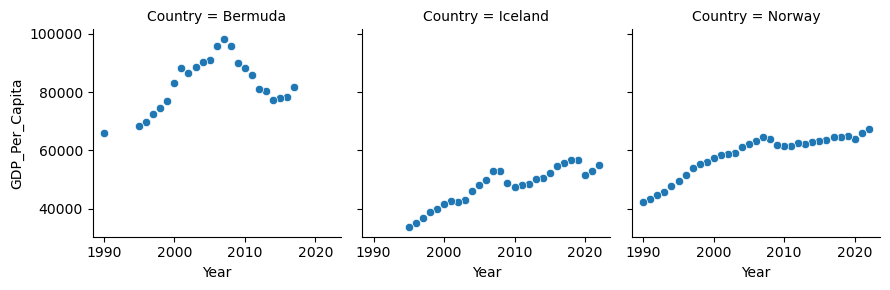

In [78]:
g = sns.FacetGrid(gu_plot, col='Country')
g.map(sns.scatterplot, 'Year', 'GDP_Per_Capita')
plt.show()

giu_2014_top_3 = giu_2014.sort_values('Internet_Users_Pct', ascending=False)

plot_countries = ['Iceland','Falkland (Malvinas) Islands','Bermuda']

plot_countries = giu[giu['Country'].isin(['Iceland','Falkland (Malvinas) Islands','Bermuda'])]

## 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [79]:
gdp_and_internet_use_2014 = gu[gu['Year']==2014]

In [80]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7,Afghanistan,2014,2144.449634,7.0000
94,Albania,2014,11586.817446,54.3000
127,Algeria,2014,11561.259795,29.5000
160,Angola,2014,8183.164577,21.3623
193,Antigua and Barbuda,2014,18779.139077,67.7800
...,...,...,...,...
7443,Uzbekistan,2014,6075.192224,35.5000
7476,Vanuatu,2014,2917.677875,18.8000
7509,Viet Nam,2014,7641.909252,41.0000
7604,Zambia,2014,3375.941270,6.5000


## 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

In [81]:
palette = sns.color_palette('husl',162)

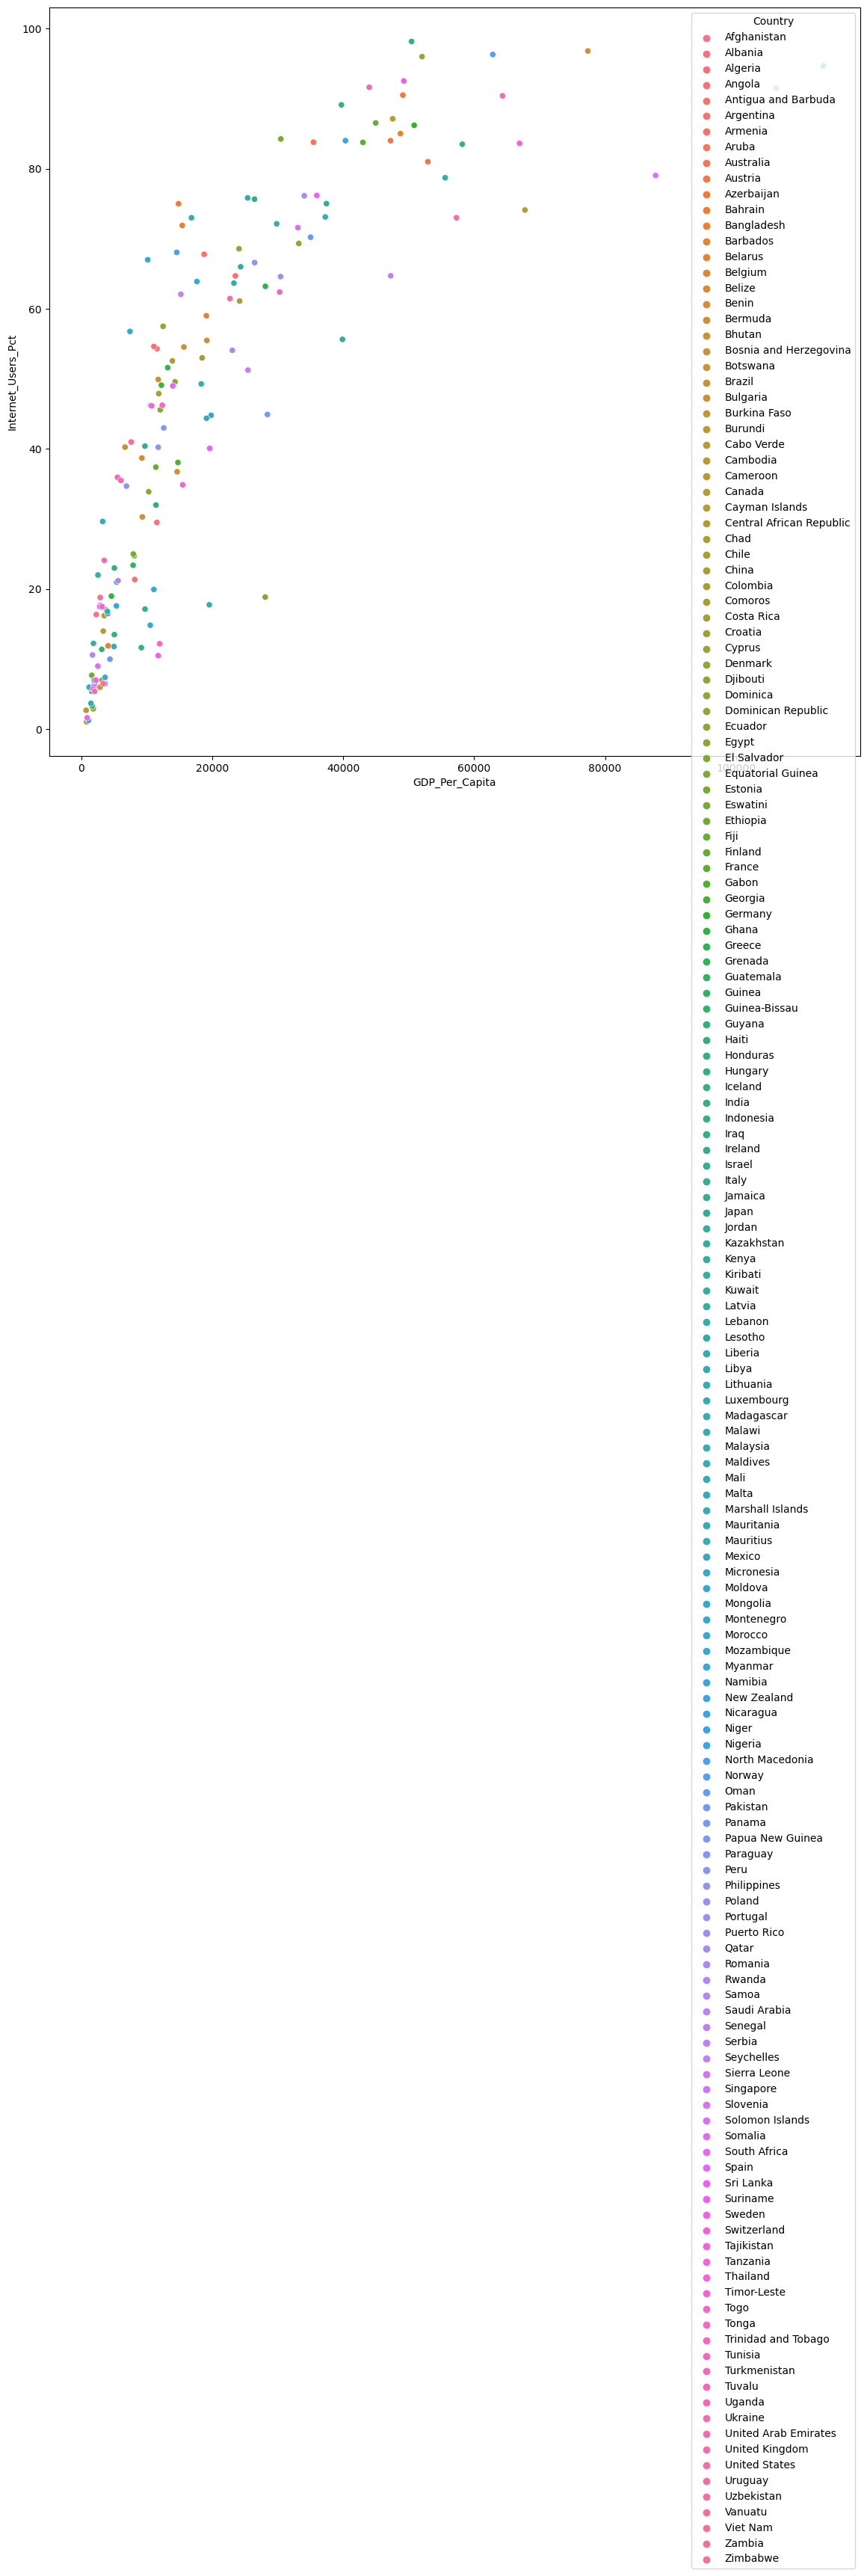

In [82]:
plt.figure(figsize = (14,13))

sns.scatterplot(data = gdp_and_internet_use_2014,
               x = 'GDP_Per_Capita',
               y = 'Internet_Users_Pct',
               hue = 'Country',
               palette = palette);

## 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [83]:
gdp_and_internet_use_2014['GDP_Group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=3, labels=['Low', 'Medium', 'High'])

C:\Users\johnc\AppData\Local\Temp\ipykernel_31896\1700539978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_Group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], q=3, labels=['Low', 'Medium', 'High'])


In [84]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_Group
7,Afghanistan,2014,2144.449634,7.0000,Low
94,Albania,2014,11586.817446,54.3000,Medium
127,Algeria,2014,11561.259795,29.5000,Medium
160,Angola,2014,8183.164577,21.3623,Medium
193,Antigua and Barbuda,2014,18779.139077,67.7800,Medium
...,...,...,...,...,...
7443,Uzbekistan,2014,6075.192224,35.5000,Low
7476,Vanuatu,2014,2917.677875,18.8000,Low
7509,Viet Nam,2014,7641.909252,41.0000,Medium
7604,Zambia,2014,3375.941270,6.5000,Low


## 25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [85]:
gdp_group_internet_pct_2014_plot = gdp_and_internet_use_2014.groupby('GDP_Group')['Internet_Users_Pct'].median()

In [86]:
gdp_group_internet_pct_2014_plot.head()

GDP_Group
Low       11.0000
Medium    45.8752
High      75.9800
Name: Internet_Users_Pct, dtype: float64

In [87]:
gdp_group_internet_pct_2014_plot_reset = gdp_group_internet_pct_2014_plot.reset_index()

In [88]:
gdp_group_internet_pct_2014_plot_reset

,GDP_Group,Internet_Users_Pct
0,Low,11.0000
1,Medium,45.8752
2,High,75.9800


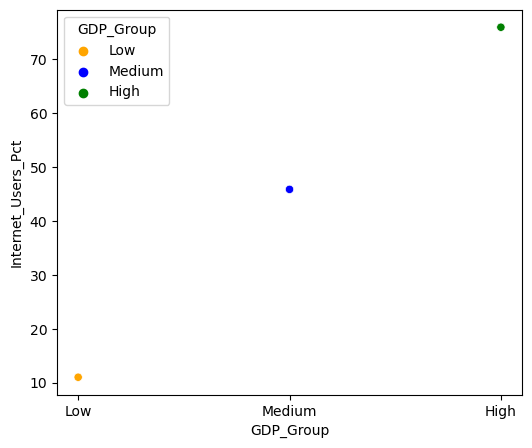

In [89]:
plt.figure(figsize = (6,5))

sns.scatterplot(data = gdp_group_internet_pct_2014_plot_reset,
               x = 'GDP_Group',
               y = 'Internet_Users_Pct',
               hue = 'GDP_Group',
               palette = ['orange', 'blue', 'green']);